The images were taken from the following (http://www.pivchallenge.org/pub03/index.html#a). From the Case A (Experimental) section the ALL IMAGES (150 MB) link. From the set of 200 images the first two A001a.tif and A001b.tif were used

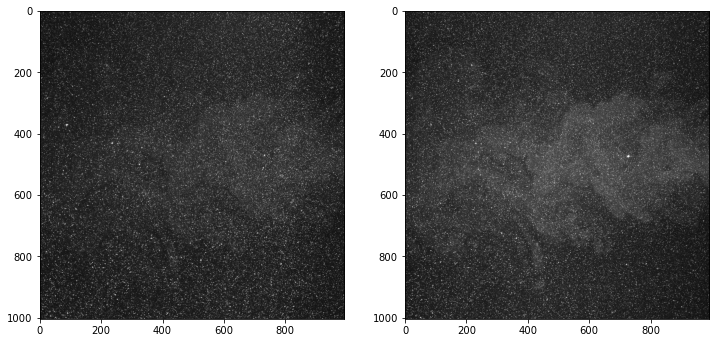

In [32]:
from openpiv import tools, pyprocess, validation, filters, scaling 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


frame_a  = tools.imread( '/home/antariksh/Downloads/Aall/A001a.tif' )
frame_b  = tools.imread( '/home/antariksh/Downloads/Aall/A001b.tif' )



fig,ax = plt.subplots(1,2,figsize=(12,10))
ax[0].imshow(frame_a,cmap=plt.cm.gray)
ax[1].imshow(frame_b,cmap=plt.cm.gray)



In [2]:


winsize = 64
searchsize= 64
overlap = 32
dt = 1 # sec


u0, v0, sig2noise = pyprocess.extended_search_area_piv(frame_a, 
                                                       frame_b,
                                                       window_size=winsize, 
                                                       overlap=overlap, 
                                                       dt=dt, 
                                                       search_area_size=searchsize, 
                                                       sig2noise_method='peak2peak')
# OpenPIV function responsible for convultaional analysis of the entire image using a search window


x, y = pyprocess.get_coordinates(image_size=frame_a.shape, 
                                 search_area_size=searchsize,
                                 overlap=overlap )
# OpenPIV module that finds the center of the interrogation window



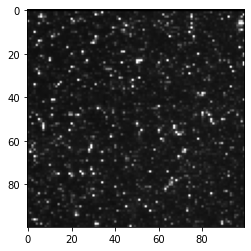

In [3]:


plt.imshow(frame_a[:100,:100],cmap=plt.cm.gray)



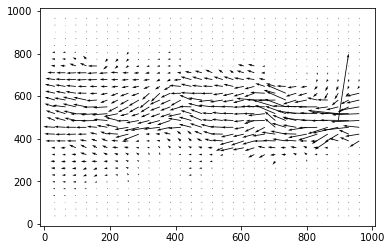

In [4]:


plt.quiver(x,y,u0,v0,scale=100)



In [5]:
u1, v1, mask = validation.sig2noise_val( u0, v0, sig2noise, threshold = 1.0)
# OpenPIV module that replaces fake vectors with 0 if below a certain threshhold


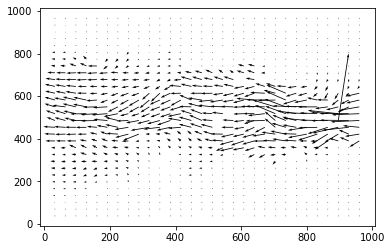

In [6]:


plt.quiver(x,y,u1,v1,scale=100)



In [7]:
u2, v2 = filters.replace_outliers( u1,v1,method='localmean', max_iter=5,
                                kernel_size = 2)

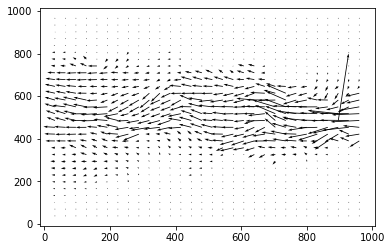

In [8]:
plt.quiver(x,y,u2,v2,scale=100)

In [9]:


# Invalid velocity vectors are replaced with a weighted average of neighbouring elements 
# that are not valid themselves. For the local mean method the kernel size is used to find
# the weighted average. If the surrounding elements are not valid then iterations are used 
# upto a point where variation in the region is below a certain threshold 


x, y, u3, v3 = scaling.uniform(x, y, u2,
                               v2,
                               scaling_factor = 1)


# field_shape = pyprocess.get_field_shape(image_size=frame_a.shape,search_area_size=searchsize,overlap=overlap)



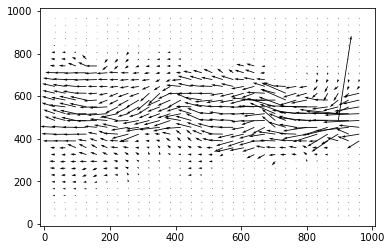

In [10]:
plt.quiver(x,y,u3,v3)

In [11]:
x,y,u3,v3 = tools.transform_coordinates(x,y,u3,v3)
tools.save(x, y, u3, v3, mask, 'exp1_001.txt' )
# saves flow field in an ascii file, masks invalid vectors

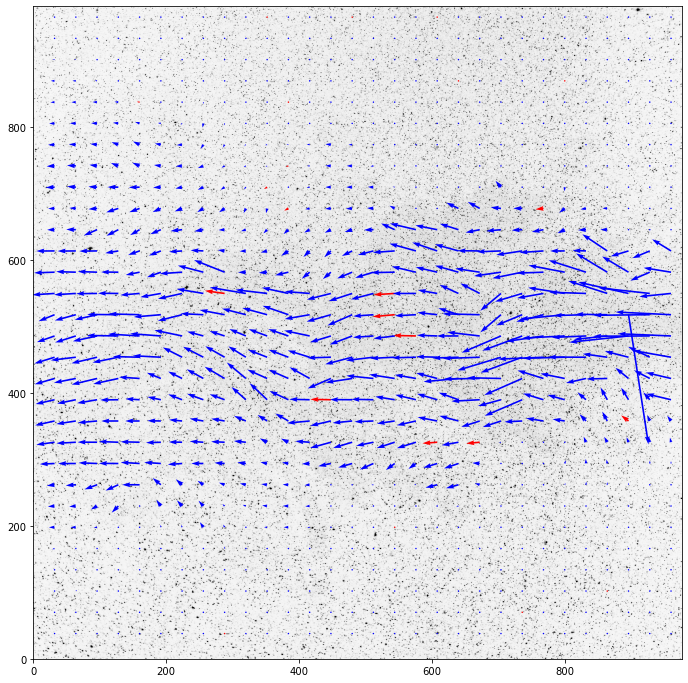

In [12]:
fig, ax = plt.subplots(figsize=(12,12))
tools.display_vector_field('exp1_001.txt', ax=ax, 
                           scaling_factor=1,
                           scale=100,
                           width=0.0025, 
                           on_img=True, 
                           image_name='/home/antariksh/Downloads/Aall/A001a.tif');
                           #image_name='/home/user/Downloads/Jet_PIV_Challenge_Case_C/c001a.bmp');




 Horizontal displacement(pixels/second) :=> 32.0


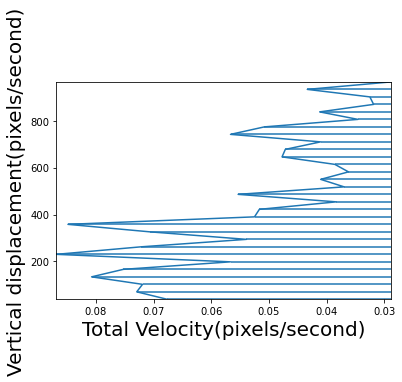


 Horizontal displacement(pixels/second) :=> 64.0


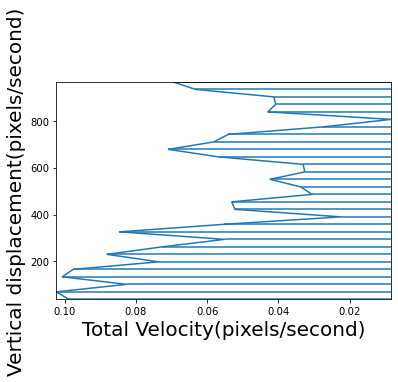


 Horizontal displacement(pixels/second) :=> 96.0


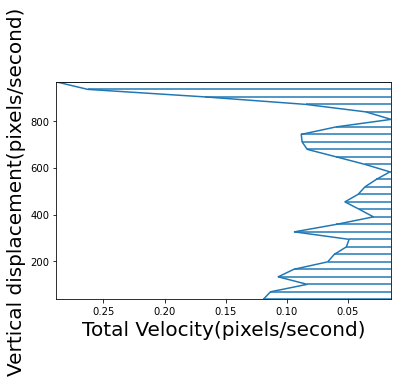


 Horizontal displacement(pixels/second) :=> 128.0


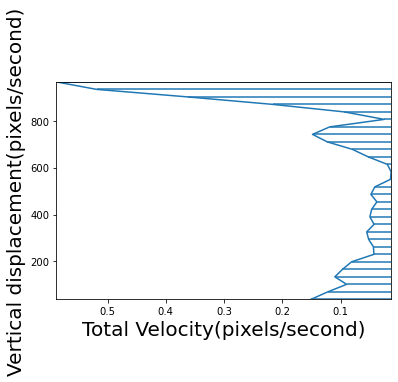


 Horizontal displacement(pixels/second) :=> 160.0


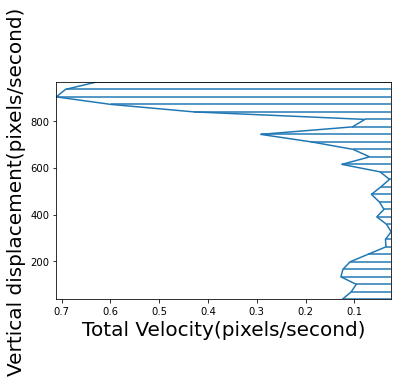


 Horizontal displacement(pixels/second) :=> 192.0


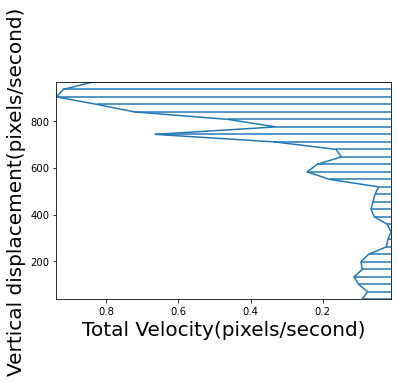


 Horizontal displacement(pixels/second) :=> 224.0


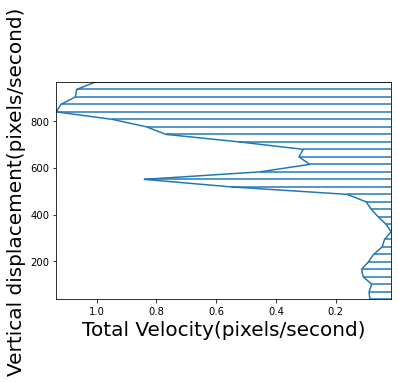


 Horizontal displacement(pixels/second) :=> 256.0


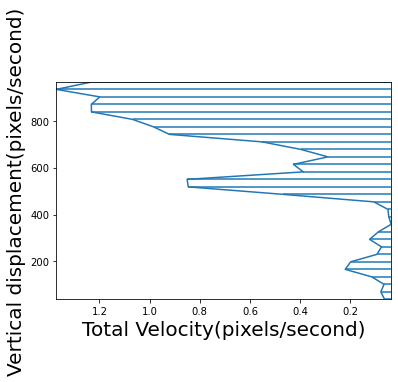


 Horizontal displacement(pixels/second) :=> 288.0


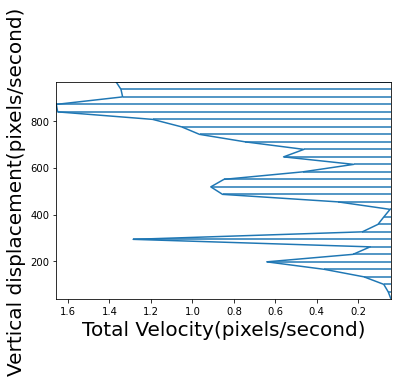


 Horizontal displacement(pixels/second) :=> 320.0


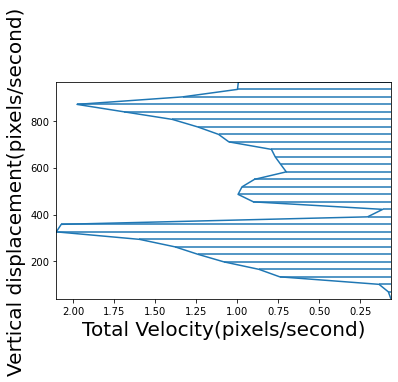


 Horizontal displacement(pixels/second) :=> 352.0


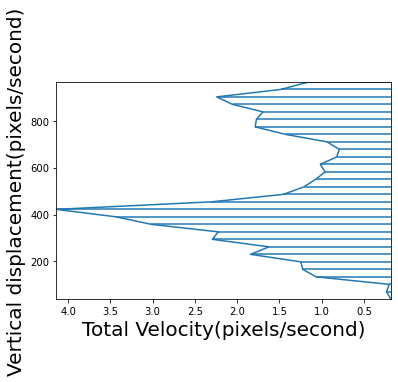


 Horizontal displacement(pixels/second) :=> 384.0


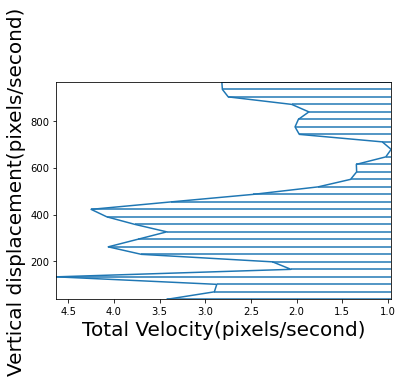


 Horizontal displacement(pixels/second) :=> 416.0


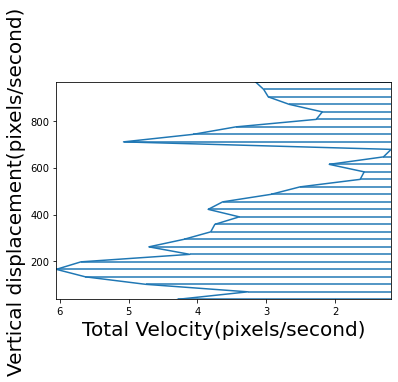


 Horizontal displacement(pixels/second) :=> 448.0


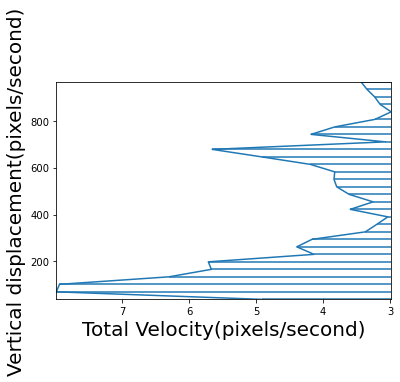


 Horizontal displacement(pixels/second) :=> 480.0


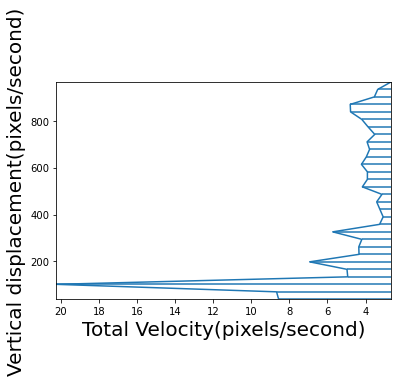


 Horizontal displacement(pixels/second) :=> 512.0


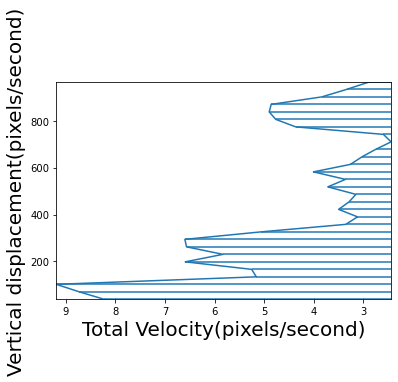


 Horizontal displacement(pixels/second) :=> 544.0


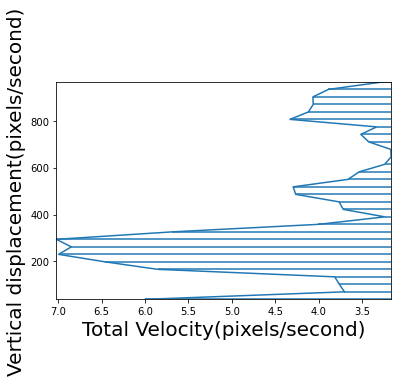


 Horizontal displacement(pixels/second) :=> 576.0


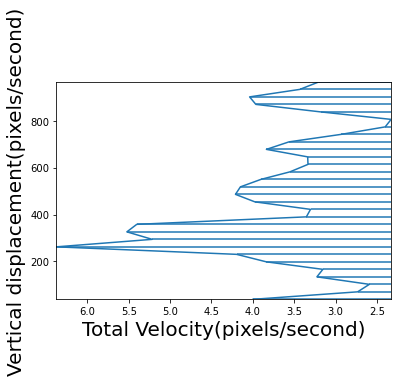


 Horizontal displacement(pixels/second) :=> 608.0


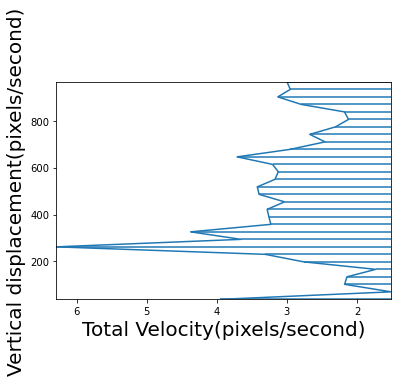


 Horizontal displacement(pixels/second) :=> 640.0


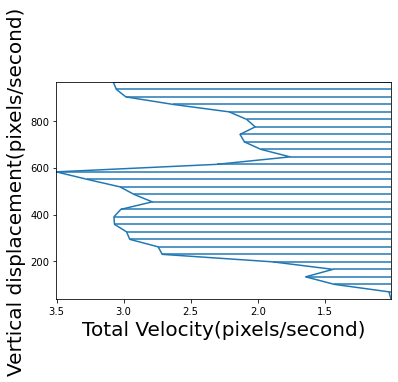


 Horizontal displacement(pixels/second) :=> 672.0


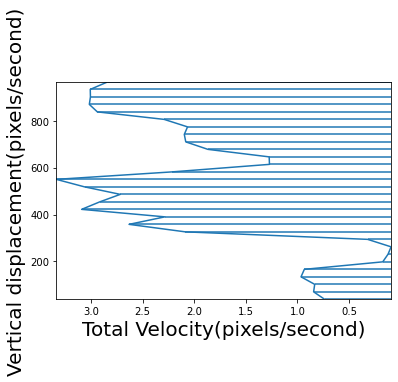


 Horizontal displacement(pixels/second) :=> 704.0


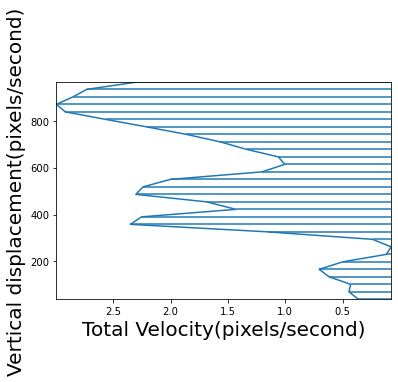


 Horizontal displacement(pixels/second) :=> 736.0


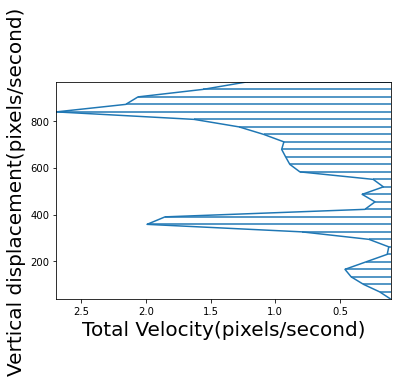


 Horizontal displacement(pixels/second) :=> 768.0


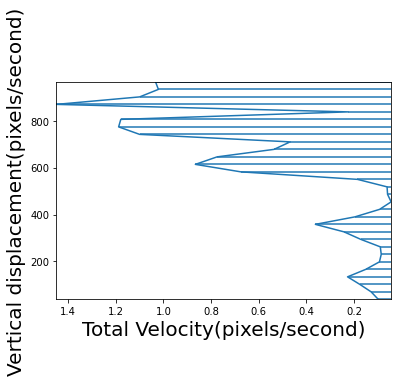


 Horizontal displacement(pixels/second) :=> 800.0


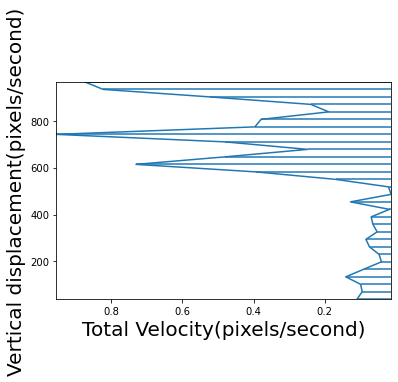


 Horizontal displacement(pixels/second) :=> 832.0


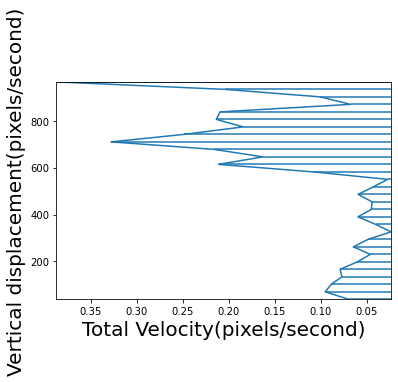


 Horizontal displacement(pixels/second) :=> 864.0


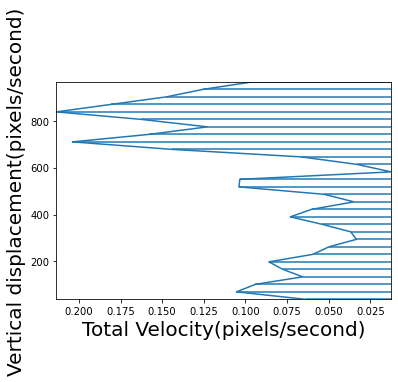


 Horizontal displacement(pixels/second) :=> 896.0


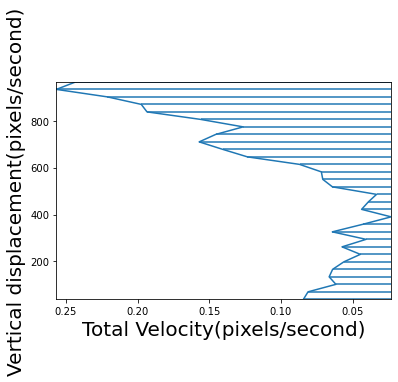


 Horizontal displacement(pixels/second) :=> 928.0


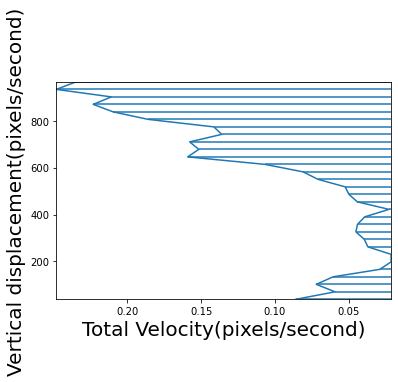


 Horizontal displacement(pixels/second) :=> 960.0


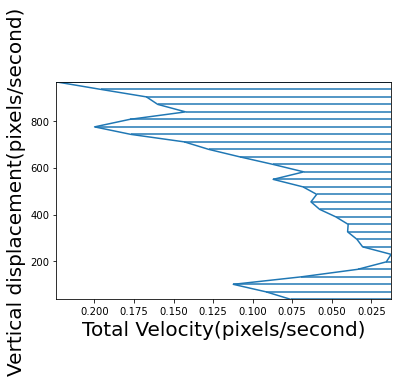

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import math
orr = []
yi = []
for i in range(0,len(x)):
    yi.append(y[i][0])
ha = []
for i in range(0,len(x)):
    ha.append(round(x[0][i],4))
    for j in range(0,len(x)):
        orr.append(math.sqrt(u3[i][j]*u3[i][j] + v3[i][j]*v3[i][j])) 

        #vector addition of the horizontal and vertical component of velocity
    print("\n Horizontal displacement(pixels/second) :=>",ha[i])
    
    plt.plot(orr,yi)
    plt.axis([max(orr),min(orr),min(yi),max(yi)])
    plt.hlines(yi,0,orr)
    plt.xlabel('Total Velocity(pixels/second)', fontsize = 20)
    plt.ylabel('Vertical displacement(pixels/second)', fontsize = 20)
    orr = []
    plt.show()


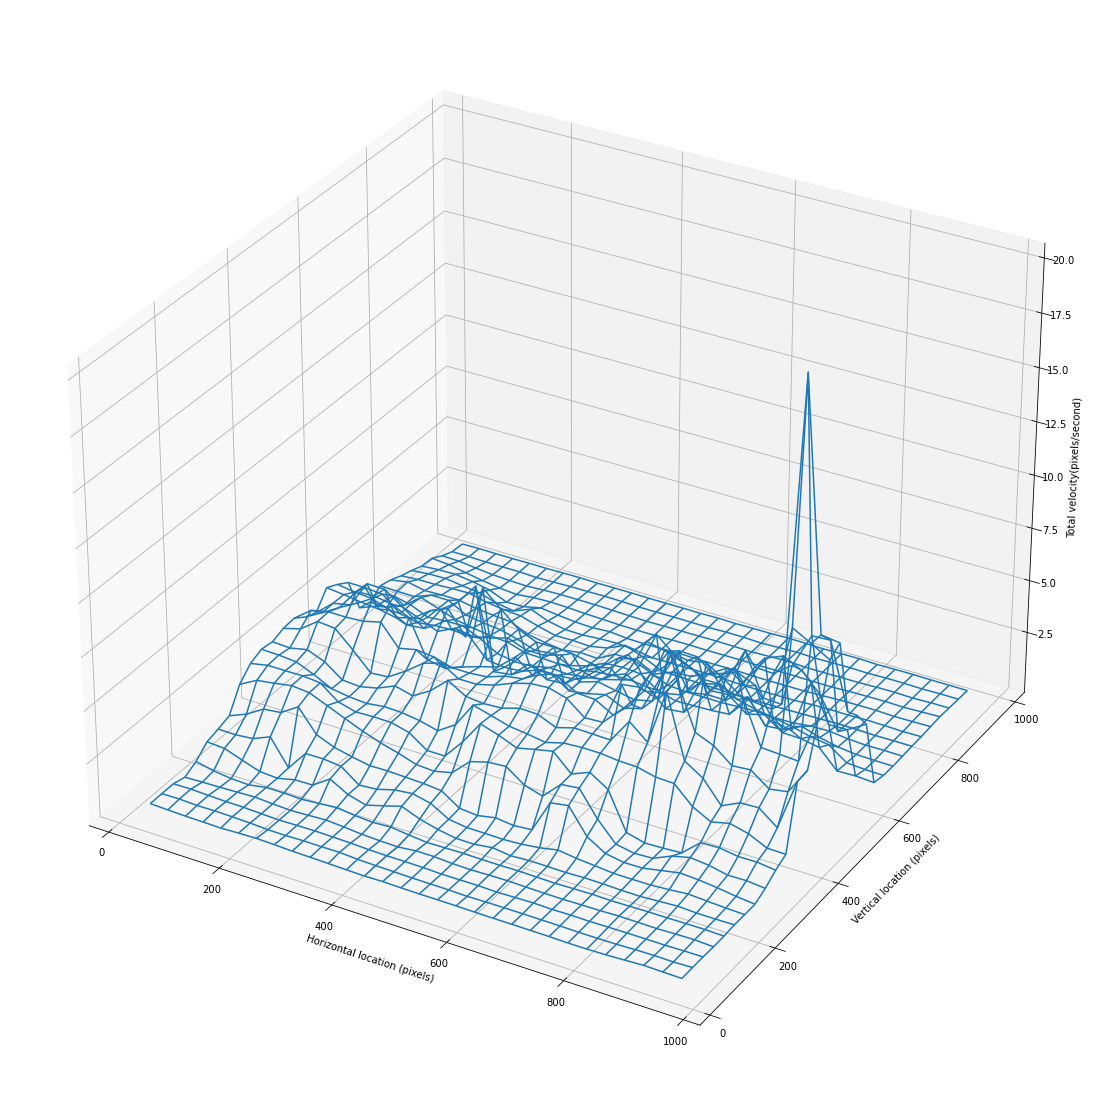

In [31]:
import matplotlib.pyplot as plt
import numpy 
import math
from mpl_toolkits.mplot3d import axes3d

orr = numpy.empty([len(x),len(x)], order='C')

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')

for i in range(0,len(x)):
    for j in range(0,len(x)):
        orr[i][j] = (math.sqrt(u3[i][j]*u3[i][j] + v3[i][j]*v3[i][j]))

ax.plot_wireframe(x, y, orr)
    

ax.set_xlabel('Horizontal location (pixels)')
ax.set_ylabel('Vertical location (pixels)')
ax.set_zlabel('Total velocity(pixels/second)')

plt.show()